In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data[:,2:]
y = iris.target

In [3]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2,criterion='gini')
dt_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [4]:
def plot_decision_boundary(model,axis):
    x0,x1 = np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(1,-1),
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(1,-1)
    
    )
    
    X_new = np.c_[x0.ravel(),x1.ravel()]
    y_predict = model.predict(X_new)
    
    zz=y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#FF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_cmap)

C:\ana\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


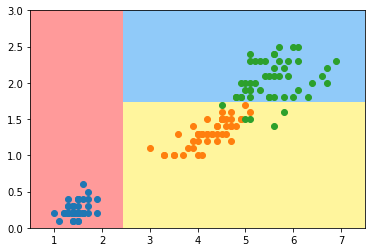

In [5]:
plot_decision_boundary(dt_clf,axis=[0.5,7.5,0,3])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.show()

### 模拟使用基尼系数

In [6]:
def split(X,y,d,value):
    index_a = X[:,d]<=value
    index_b = X[:,d]>value
    return X[index_a], X[index_b], y[index_a],y[index_b]

from collections import Counter
from math import log
def gini(y):
    counter = Counter(y)
    res = 1.0
    for num in counter.values():
        p = num/len(y)
        res += -p**2
    return res

def try_split(X,y):
    best_g = float('inf')
    best_d, best_v = -1,-1
    for d in range(X.shape[1]):
        sorted_index = np.argsort(X[:,d])
        for i in range(1,len(X)):
            if X[sorted_index[i-1],d] != X[sorted_index[i],d]:
                v = (X[sorted_index[i-1],d] + X[sorted_index[i],d])/2
                x_l, x_r, y_l,y_r = split(X,y,d,v)
                g = gini(y_l)+gini(y_r)
                if g<best_g:
                    best_g = g
                    best_d = d
                    best_v =v
    return best_g,best_d,best_v
        

In [7]:
best_g,best_d,best_v = try_split(X,y)
print('best_g = ',best_g)
print('best_d = ',best_d)
print('best_v = ',best_v)


best_g =  0.5
best_d =  0
best_v =  2.45


In [10]:
X1_l,X1_r,y1_l,y1_r = split(X,y,best_d,best_v)

In [11]:
gini(y1_l)

0.0

In [12]:
gini(y1_r)

0.5

In [13]:
best_g2,best_d2,best_v2 = try_split(X1_r,y1_r)
print('best_g = ',best_g2)
print('best_d = ',best_d2)
print('best_v = ',best_v2)


best_g =  0.2105714900645938
best_d =  1
best_v =  1.75


In [14]:
X2_l,X2_r,y2_l,y2_r = split(X1_r,y1_r,best_d2,best_v2)

In [15]:
gini(y2_l)

0.1680384087791495

In [16]:
gini(y2_r)

0.04253308128544431